# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## Analyze the data.

In [9]:
# Find the most popular sales channel.
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [10]:
# Find the most popular trip type.
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [11]:
# Find the average purchase lead time.
df['purchase_lead'].mean()

84.94048

In [12]:
# Find the average length of stay.
df['length_of_stay'].mean()

23.04456

In [13]:
# Find the most popular flight hour.
df['flight_hour'].value_counts()

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64

In [14]:
# Find the most popular flight day.
df['flight_day'].value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

In [15]:
# Find the most popular route.
df['route'].value_counts()


AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [16]:
# Find the most popular booking origin.
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [17]:
# Find the most popular add-on.
df['wants_extra_baggage'].value_counts()

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

In [18]:
# Find the most popular in-flight meal.
df['wants_in_flight_meals'].value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [19]:
# Find the average flight duration.
df['flight_duration'].mean()

7.2775608

In [20]:
# Find the average booking completion rate.
df['booking_complete'].mean()

0.14956

## Visualize the data.

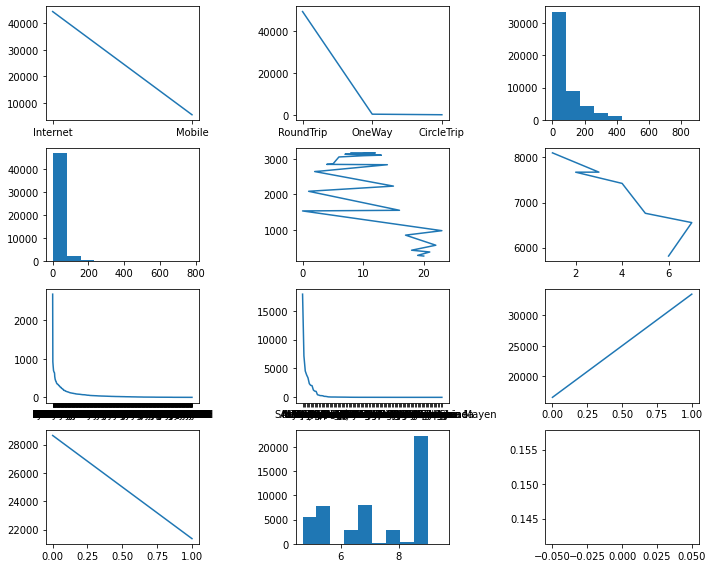

In [21]:
import matplotlib.pyplot as plt

# Create a figure and an axes object.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 8))

# Plot a bar chart of the most popular sales channels.
axes[0, 0].plot(df['sales_channel'].value_counts())

# Plot a bar chart of the most popular trip types.
axes[0, 1].plot(df['trip_type'].value_counts())

# Plot a histogram of the purchase lead time.
axes[0, 2].hist(df['purchase_lead'])

# Plot a histogram of the length of stay.
axes[1, 0].hist(df['length_of_stay'])

# Plot a bar chart of the most popular flight hours.
axes[1, 1].plot(df['flight_hour'].value_counts())

# Plot a bar chart of the most popular flight days.
axes[1, 2].plot(df['flight_day'].value_counts())

# Plot a bar chart of the most popular routes.
axes[2, 0].plot(df['route'].value_counts())

# Plot a bar chart of the most popular booking origins.
axes[2, 1].plot(df['booking_origin'].value_counts())

# Plot a bar chart of the most popular add-ons.
axes[2, 2].plot(df['wants_extra_baggage'].value_counts())

# Plot a bar chart of the most popular in-flight meals.
axes[3, 0].plot(df['wants_in_flight_meals'].value_counts())

# Plot a histogram of the flight duration.
axes[3, 1].hist(df['flight_duration'])

# Plot a bar chart of the average booking completion rate.
axes[3, 2].plot(df['booking_complete'].mean())

# Arrange the axes objects in a grid layout.
plt.tight_layout()

# Show the figure.
plt.show()


# RandomForest 

### Import the necessary libraries

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Separate features and target variable

In [23]:
X = df.drop('booking_complete', axis=1)
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62


In [24]:
y = df['booking_complete']
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

### Encode categorical variables

In [25]:
cat_cols = X.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
label_encoder
X[cat_cols] = X[cat_cols].apply(label_encoder.fit_transform)
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,720,4,1,0,1,5.62
49996,1,0,2,111,6,4,7,720,4,0,0,0,5.62
49997,1,0,2,24,6,22,6,720,4,0,0,1,5.62
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62


### Normalize numerical variables

In [26]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.400684,0,2,1.957530,-0.119353,-0.381764,1.096754,0,61,0.703747,-0.649919,-0.863497,-1.174175
1,-0.579559,0,2,0.299164,-0.089844,-1.120780,1.096754,0,61,-1.420965,-0.649919,-0.863497,-1.174175
2,0.400684,0,2,1.747470,-0.030824,1.465775,-0.408687,0,36,0.703747,1.538654,-0.863497,-1.174175
3,-0.579559,0,2,0.122272,0.234761,-0.936026,1.096754,0,61,-1.420965,-0.649919,1.158082,-1.174175
4,0.400684,0,2,-0.187290,-0.030824,1.096267,-0.408687,0,36,0.703747,-0.649919,1.158082,-1.174175


### Split the dataset into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
39087,-0.579559,1,2,-0.773246,-0.532487,0.726759,1.598567,419,51,-1.420965,-0.649919,1.158082,-0.439297
30893,-0.579559,0,2,2.355538,-0.561996,-0.012257,-1.412314,289,93,0.703747,-0.649919,-0.863497,1.037139
45278,0.400684,0,2,1.272072,-0.502977,-0.751272,-0.408687,300,85,0.703747,-0.649919,-0.863497,-0.439297
16398,-0.579559,0,2,-0.065677,-0.060334,0.357251,1.096754,522,4,0.703747,-0.649919,-0.863497,0.870121
13653,-0.579559,0,2,0.221774,-0.089844,-0.566518,1.598567,423,85,0.703747,-0.649919,1.158082,-0.439297


In [28]:
X_test.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
33553,0.400684,0,2,-0.419461,-0.561996,1.096267,0.093127,549,43,0.703747,1.538654,-0.863497,-0.185430
9427,-0.579559,1,2,-0.430517,1.828277,0.911513,-1.412314,291,93,0.703747,1.538654,-0.863497,1.037139
199,-0.579559,0,2,0.520279,-0.089844,-0.012257,-1.412314,6,81,0.703747,-0.649919,-0.863497,1.037139
12447,-0.579559,0,2,-0.297848,-0.148863,2.574298,-1.412314,390,43,0.703747,1.538654,1.158082,0.195370
39489,0.400684,0,2,-0.386294,-0.532487,-0.751272,0.093127,436,17,0.703747,-0.649919,-0.863497,-0.439297


In [29]:
print(f"y-train\n{y_train.head()}\ny-test\n{y_test.head()}")

y-train
39087    0
30893    1
45278    0
16398    0
13653    0
Name: booking_complete, dtype: int64
y-test
33553    0
9427     0
199      0
12447    0
39489    0
Name: booking_complete, dtype: int64


### Instantiate and train the RandomForestClassifier

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make predictions on the testing data

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluate the model's performanc

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8544


The accuracy of the model is 85%. This means that the model correctly predicts whether a booking will be completed 80% of the time

# cross-validation

Now, let's evaluate the model using cross-validation. Cross-validation is a technique that is used to evaluate the performance of a model on data that it has not seen before. To do this, we will split the data into 10 folds. We will then train the model on 9 of the folds and test it on the 10th fold. We will repeat this process 10 times, and then average the accuracy scores

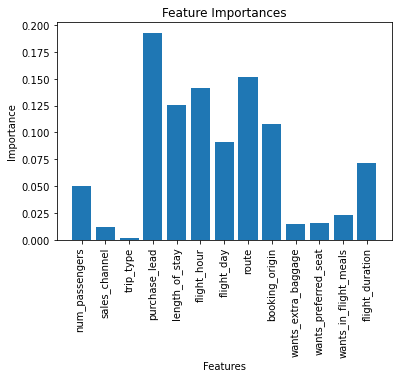

Mean CV Score: 0.8511750000000001
Std CV Score: 0.0037849207389323287


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# Train the RandomForestClassifier and perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Fit the model to the entire dataset
model.fit(X_train, y_train)

# Visualize feature importances
importances = model.feature_importances_
features = X.columns
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()




# Print the mean and standard deviation of cross-validation scores
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)


# RUFPAD